In [28]:
from drawdata import draw_scatter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, roc_auc_score
import random

import warnings
warnings.filterwarnings('ignore')

In [29]:
draw_scatter()

In [30]:
df = pd.read_csv("./data.csv")

In [31]:
# train/test split
X = df[["x", "y"]].values
Y = df["z"].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=52)
y_test = np.array([1 if p=="a" else 0 for p in y_test])
y_train = np.array([1 if p=="a" else 0 for p in y_train])

In [32]:
# create model
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

LogisticRegression()

In [49]:
y_pred_proba = lgr.predict_proba(X_test)[:,1]
thresholds = np.linspace(0, 1, 100) # разные пороговые значения

In [50]:
def get_fp_tp(y, proba, threshold):
    # Разносим по классам
    pred = pd.Series(np.where(proba>=threshold, 1, 0)) #, dtype='category')
    pred.fillna(0)
#     print(pred)
    
    # Создаём матрицу ошибок
    confusion_matrix = pred.groupby([y, pred]).size().unstack()
    confusion_matrix.fillna(0)
#     print(confusion_matrix)
    col = list(confusion_matrix.columns.values)
    if confusion_matrix.shape == (2, 1) and col[0] == 0:
        false_positives = 0
        true_positives = 0
    else:
        if np.isnan(confusion_matrix.loc[0, 1]):
            false_positives = 0
        else:
            false_positives = confusion_matrix.loc[0, 1]
        true_positives = confusion_matrix.loc[1, 1]
    return false_positives, true_positives, pred

In [51]:
positives = np.sum(y_test==1)
negatives = np.sum(y_test==0)
print('a:', positives, 'b:', negatives)

a: 54 b: 68


Text(0.5, 1.0, 'ROC-кривая')

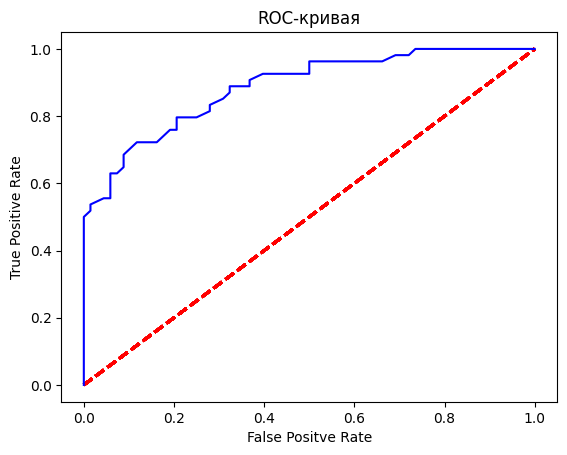

In [52]:
tpr = []
fpr = []
for th in thresholds:
    fp, tp,_ = get_fp_tp(y_test, y_pred_proba, th)
    tpr.append(tp/positives)
    fpr.append(fp/negatives)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

plt.plot(fpr, tpr, label="ROC Curve", color="blue")
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC-кривая')

Text(0.5, 1.0, 'PR-кривая')

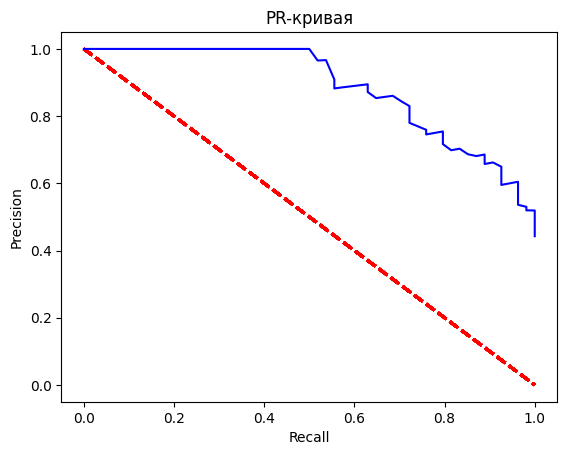

In [53]:
positives = np.sum(y_test==1)
precision = []
recall = []
for th in thresholds:
    fp, tp, _ = get_fp_tp(y_test, y_pred_proba, th)
    if ((tp + fp) == 0) and (tp == 0):
        new_precision = 1
    else:
        new_precision = tp/(tp + fp)
    precision.append(new_precision)
    recall.append(tp/positives)
    plt.plot([0, 1], [1, 0], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

plt.plot(recall, precision, label="ROC Curve", color="blue")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('PR-кривая')

In [38]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Площадь под кривой ROC:", roc_auc)
pr_auc = average_precision_score(y_test, y_pred_proba)
print("Площадь под кривой PR:", pr_auc)

Площадь под кривой ROC: 0.8856209150326797
Площадь под кривой PR: 0.884479271762195


[0.37042703 0.51079149 0.99230792 0.60117024 0.24032438 0.5060849
 0.40673847 0.70835731 0.51821634 0.98802085]
7 3


Text(0.5, 1.0, 'ROC-кривая')

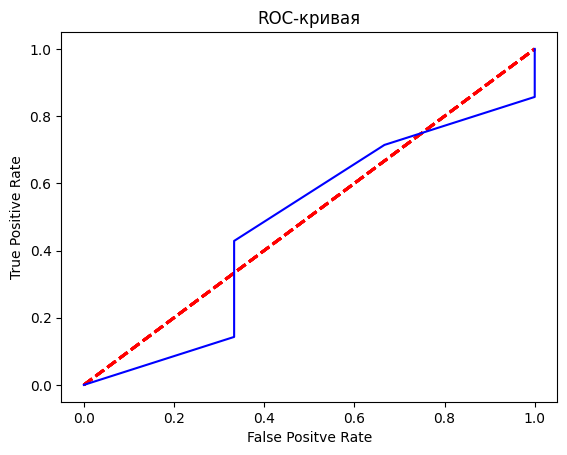

In [48]:
lables = np.array([0,0,0,1,1,1,1,1,1,1])
pred = np.array([random.random() for i in range(10)])
thresholds_2 = np.linspace(0, 1, 10)
positives_2 = np.sum(lables==1)
negatives_2 = np.sum(lables==0)

print(pred)
print(positives_2, negatives_2)

tpr = []
fpr = []
for th in thresholds_2:
    fp, tp,_ = get_fp_tp(lables, pred, th)
    tpr.append(tp/positives_2)
    fpr.append(fp/negatives_2)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

plt.plot(fpr, tpr, label="ROC Curve", color="blue")
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC-кривая')